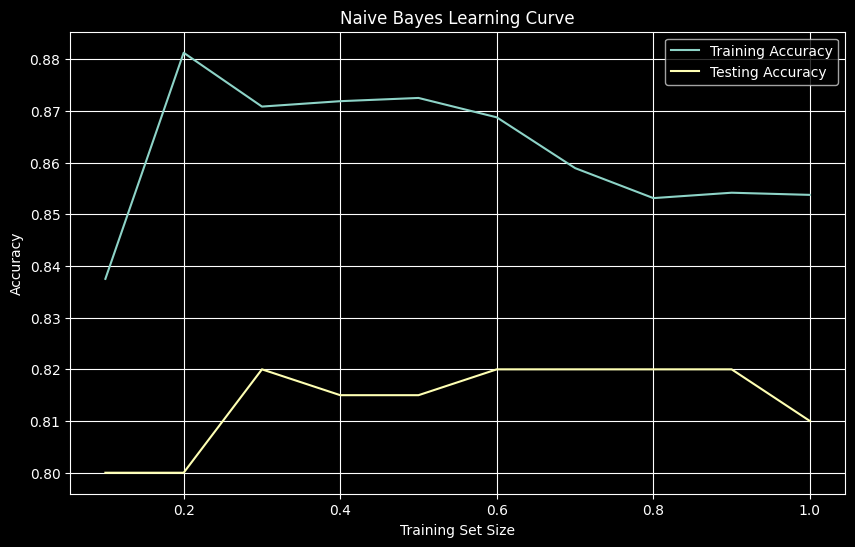

Final Test Accuracy: 0.8100


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        
        # Calculate mean, variance, and prior for each class
        self.mean = np.zeros((n_classes, n_features))
        self.var = np.zeros((n_classes, n_features))
        self.priors = np.zeros(n_classes)
        
        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / float(n_samples)
    
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        posteriors = []
        
        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
        
        return self.classes[np.argmax(posteriors)]
    
    def _pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(- (x - mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

def plot_learning_curve(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_accuracies = []
    test_accuracies = []
    
    for size in train_sizes:
        n_samples = int(len(X_train) * size)
        X_subset = X_train[:n_samples]
        y_subset = y_train[:n_samples]
        
        nb = NaiveBayes()
        nb.fit(X_subset, y_subset)
        
        train_pred = nb.predict(X_subset)
        train_acc = np.mean(train_pred == y_subset)
        train_accuracies.append(train_acc)
        
        test_pred = nb.predict(X_test)
        test_acc = np.mean(test_pred == y_test)
        test_accuracies.append(test_acc)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_accuracies, label='Training Accuracy')
    plt.plot(train_sizes, test_accuracies, label='Testing Accuracy')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Naive Bayes Learning Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Plot the learning curve
plot_learning_curve(X, y)

# Train on full dataset and print final accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb = NaiveBayes()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
final_accuracy = np.mean(y_pred == y_test)
print(f"Final Test Accuracy: {final_accuracy:.4f}")
